In [4]:
!pip install prophet
!pip install yfinance
key = input("Press a key: ")
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on colab


  Using cached yfinance-0.1.74-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (7.0 MB)


Press a key:  y


In [50]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf  
import pandas as pd

df = pd.read_csv('dataset_social_technical_1d_v2.csv')
df.head()

,date,close,volume,SMA_15,SMA_ratio,SMA15_Volume,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
0,2018-01-02,64.400002,219072.0,64.573334,0.994017,348265.266667,0.555061,43.370749,1.145254,49.278354,0.817626,0.108905,0.031072,0.20095,0.505398,0.476686,0.017916
1,2018-01-03,66.199997,256706.0,64.484667,0.993662,329124.000000,0.611814,49.213487,1.075724,42.185655,1.001608,0.167948,2.763115,-0.61240,0.824533,0.169098,0.006369
2,2018-01-04,66.680000,306794.0,64.465334,0.990829,310316.666667,0.691514,94.326116,1.055682,48.481671,1.291496,-0.179607,0.331028,0.22870,0.666439,0.313903,0.019658
3,2018-01-05,67.379997,176037.0,64.615334,0.989152,300906.333333,0.811558,81.718468,0.969574,64.115417,1.050823,-0.474865,0.747608,-0.03848,0.168377,0.743322,0.088301
4,2018-01-08,68.120003,271314.0,64.908667,0.987054,281487.000000,0.872077,94.515485,0.931893,80.470877,0.936350,-0.773145,1.671646,-0.30270,0.502167,0.474406,0.023427


In [51]:
# Plot the close price of the Stock prices
fig = px.line(x = df['close'].index, 
              y = df['close'])
fig.show()



In [34]:
from prophet import Prophet

model = Prophet()
p_df = pd.DataFrame({ "ds": df.index, "y": df["close"]}).reset_index(drop=True)



In [52]:

p_df['ds'] = df['date']
p_df.head()

/tmp/ipykernel_89/233946970.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.573334,43.370749,1.145254,0.031072,219072.0,0.20095,64.400002
1,2018-01-03,64.484667,49.213487,1.075724,2.763115,256706.0,-0.61240,66.199997
2,2018-01-04,64.465334,94.326116,1.055682,0.331028,306794.0,0.22870,66.680000
3,2018-01-05,64.615334,81.718468,0.969574,0.747608,176037.0,-0.03848,67.379997
4,2018-01-08,64.908667,94.515485,0.931893,1.671646,271314.0,-0.30270,68.120003


In [54]:
model = Prophet()
model.fit(p_df)


12:07:06 - cmdstanpy - INFO - Chain [1] start processing
12:07:06 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1006,2022-11-02
1007,2022-11-03
1008,2022-11-04
1009,2022-11-05


In [56]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2022-11-02,35.106059,24.713088,35.054691,32.242768,37.700559,-5.076148,-5.076148,-5.076148,-0.451459,-0.451459,-0.451459,-4.624689,-4.624689,-4.624689,0.0,0.0,0.0,30.029911
1007,2022-11-03,35.065724,24.996785,35.134401,32.143613,37.702420,-5.081565,-5.081565,-5.081565,-0.354278,-0.354278,-0.354278,-4.727287,-4.727287,-4.727287,0.0,0.0,0.0,29.984159
1008,2022-11-04,35.025389,24.525670,35.030894,32.041117,37.696187,-5.112167,-5.112167,-5.112167,-0.286819,-0.286819,-0.286819,-4.825348,-4.825348,-4.825348,0.0,0.0,0.0,29.913221
1009,2022-11-05,34.985054,25.585339,36.237781,31.962380,37.668493,-3.950657,-3.950657,-3.950657,0.967577,0.967577,0.967577,-4.918234,-4.918234,-4.918234,0.0,0.0,0.0,31.034396
1010,2022-11-06,34.944719,25.557804,35.821615,31.903429,37.678308,-4.037688,-4.037688,-4.037688,0.967578,0.967578,0.967578,-5.005265,-5.005265,-5.005265,0.0,0.0,0.0,30.907031


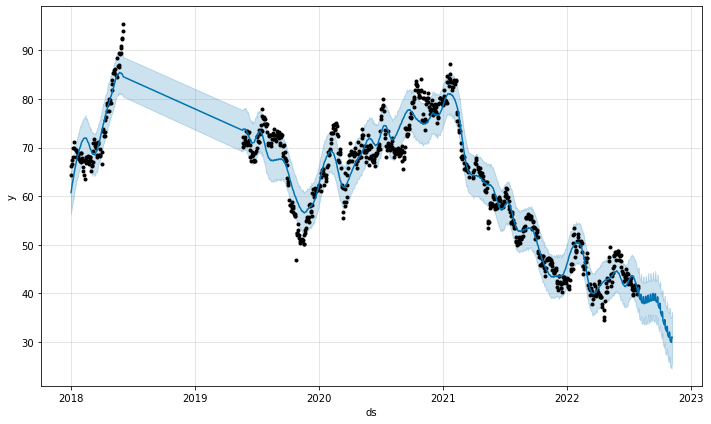

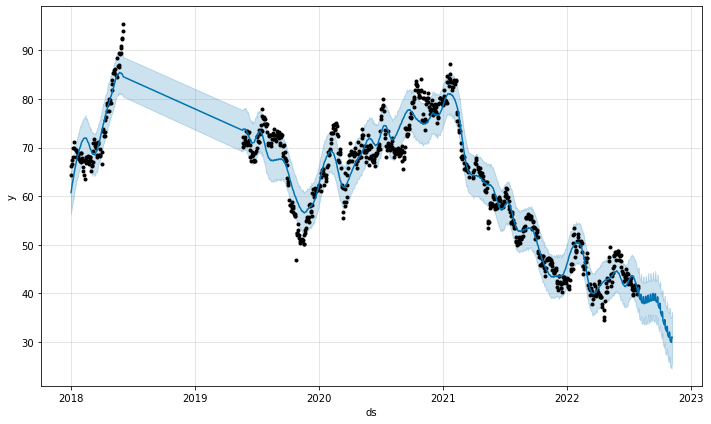

In [57]:
model.plot(forecast)

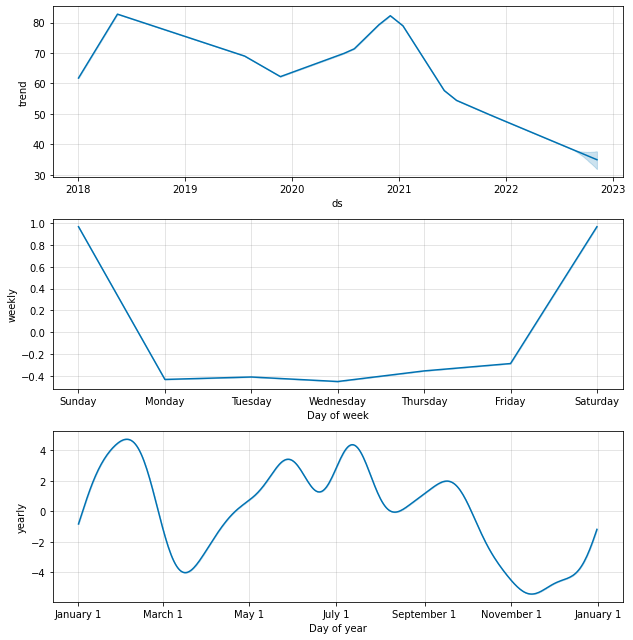

In [58]:
fig2 = model.plot_components(forecast)

In [71]:
model = Prophet()
model.add_country_holidays(country_name='FR')

model.add_regressor('SMA_15')
model.add_regressor('Stochastic_15')
model.add_regressor('Stochastic_Ratio')
model.add_regressor('price_pct_variation')
model.add_regressor('volume')
model.add_regressor('title_vader_compound')

p_df = df[['date', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'price_pct_variation', 'volume', 'title_vader_compound', 'close']]
p_df.columns = ['ds', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'price_pct_variation', 'volume', 'title_vader_compound', 'y']

# model.fit(p_df)


12:13:44 - cmdstanpy - INFO - Chain [1] start processing
12:13:44 - cmdstanpy - INFO - Chain [1] done processing


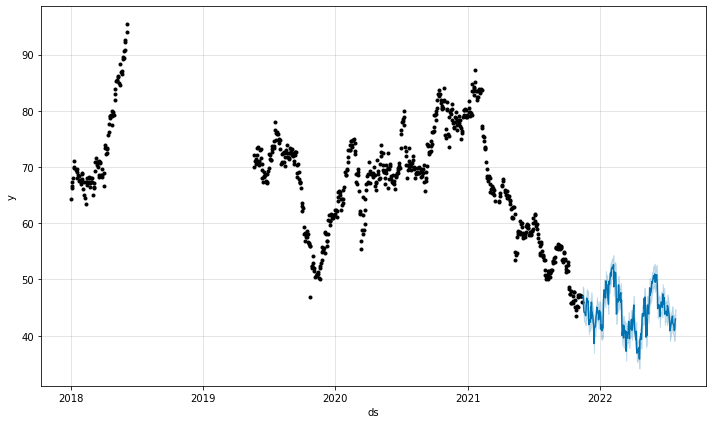

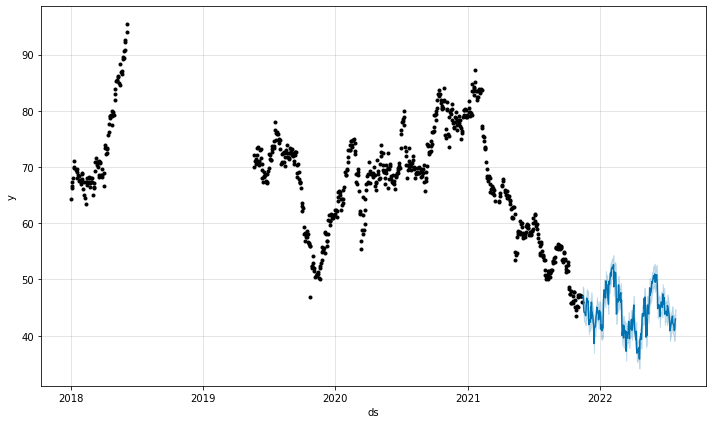

In [72]:
train_size = int(0.8 * len(df))
p_df = p_df.rename(columns = {"date": "ds"})
X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

model.fit(X_train)
forecast = model.predict(X_test)
model.plot(forecast)



In [73]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
823,2022-02-16
824,2022-02-17
825,2022-02-18
826,2022-02-19


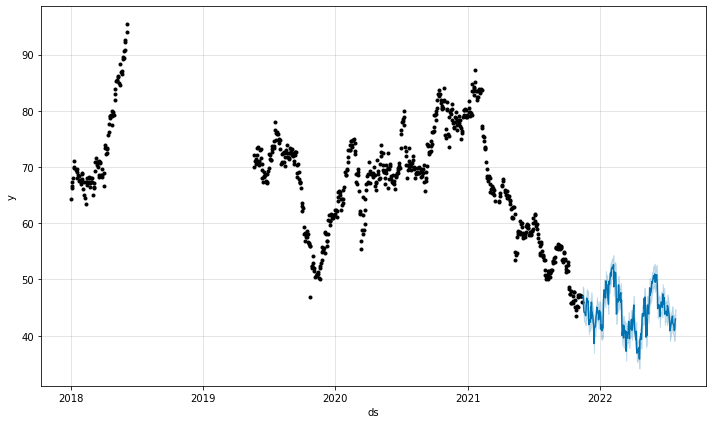

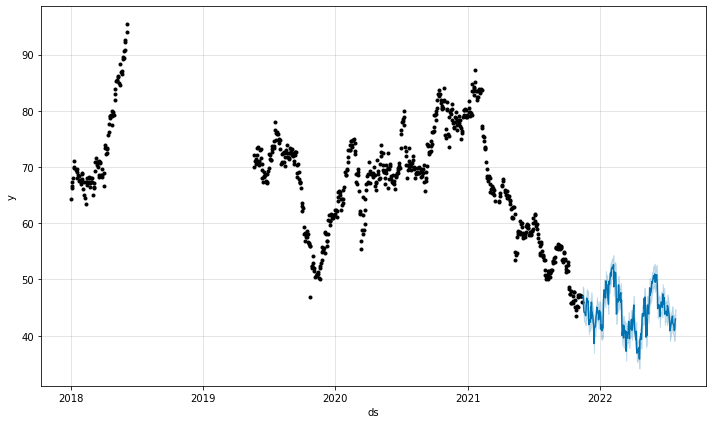

In [74]:
model.plot(forecast)

In [75]:
future = model.make_future_dataframe(periods=1)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
724,2021-11-09
725,2021-11-10
726,2021-11-11
727,2021-11-12


In [76]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

In [77]:
p_df.head()

,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.573334,43.370749,1.145254,0.031072,219072.0,0.20095,64.400002
1,2018-01-03,64.484667,49.213487,1.075724,2.763115,256706.0,-0.61240,66.199997
2,2018-01-04,64.465334,94.326116,1.055682,0.331028,306794.0,0.22870,66.680000
3,2018-01-05,64.615334,81.718468,0.969574,0.747608,176037.0,-0.03848,67.379997
4,2018-01-08,64.908667,94.515485,0.931893,1.671646,271314.0,-0.30270,68.120003


In [ ]:
# df_merge = pd.merge(p_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
# df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
# df_merge.head()


In [78]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/2 [00:00<?, ?it/s]

12:16:18 - cmdstanpy - INFO - Chain [1] start processing
12:16:18 - cmdstanpy - INFO - Chain [1] done processing
12:16:22 - cmdstanpy - INFO - Chain [1] start processing
12:16:22 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-18,68.139724,66.624801,69.666665,68.019997,2020-05-16
1,2020-05-19,66.924421,65.446610,68.501715,66.940002,2020-05-16
2,2020-05-20,70.407112,68.719294,71.936922,69.000000,2020-05-16
3,2020-05-21,71.294945,69.637572,72.845202,69.400002,2020-05-16
4,2020-05-22,71.611541,69.906181,73.247735,70.300003,2020-05-16


In [81]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,34 days,4.486876,2.118225,1.812334,0.024716,0.026799,0.024318,0.469388
1,35 days,4.481046,2.116848,1.802732,0.024597,0.026799,0.024197,0.469388
2,36 days,4.502760,2.121971,1.821481,0.024829,0.026799,0.024432,0.469388
3,37 days,4.650255,2.156445,1.876029,0.025621,0.026958,0.025208,0.448980
4,38 days,4.694127,2.166593,1.894170,0.025888,0.026958,0.025471,0.428571


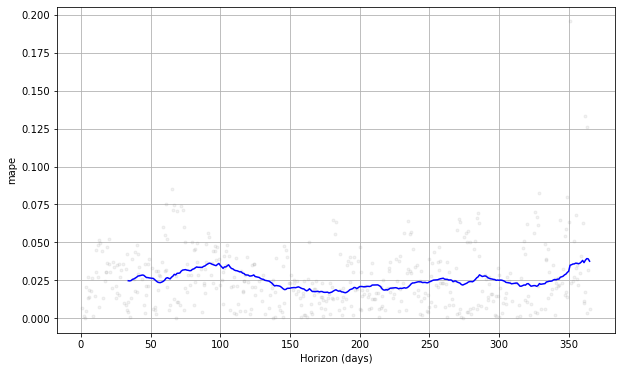

In [82]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [32]:
# Same with Roberta
model = Prophet()
model.add_regressor('close')

In [88]:
model = Prophet()
model.add_country_holidays(country_name='FR')

model.add_regressor('SMA_15')
model.add_regressor('Stochastic_15')
model.add_regressor('Stochastic_Ratio')
model.add_regressor('price_pct_variation')
model.add_regressor('volume')
model.add_regressor('title_roberta_neg')
model.add_regressor('title_roberta_neu')
model.add_regressor('title_roberta_pos')

p_df = df[['date', 
           'SMA_15', 
           'Stochastic_15', 
           'Stochastic_Ratio', 
           'price_pct_variation', 
           'volume', 
           'title_roberta_neg', 
           'title_roberta_neu', 
           'title_roberta_pos', 
           'close']]
p_df.columns = ['ds', 
                'SMA_15', 
                'Stochastic_15', 
                'Stochastic_Ratio', 
                'price_pct_variation', 
                'volume', 
                'title_roberta_neg', 
                'title_roberta_neu', 
                'title_roberta_pos', 
                'y']


12:20:09 - cmdstanpy - INFO - Chain [1] start processing
12:20:10 - cmdstanpy - INFO - Chain [1] done processing


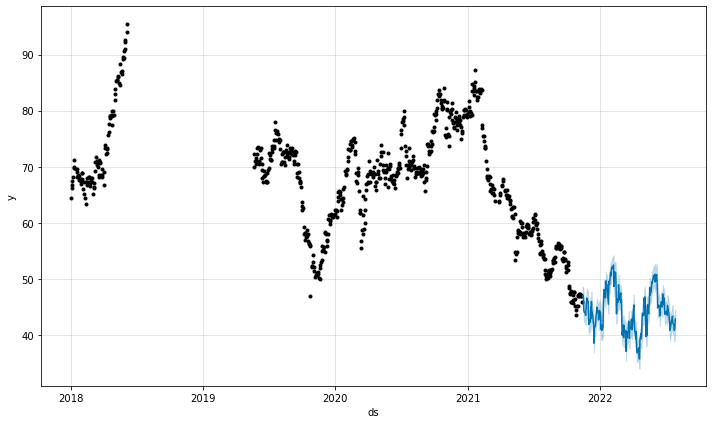

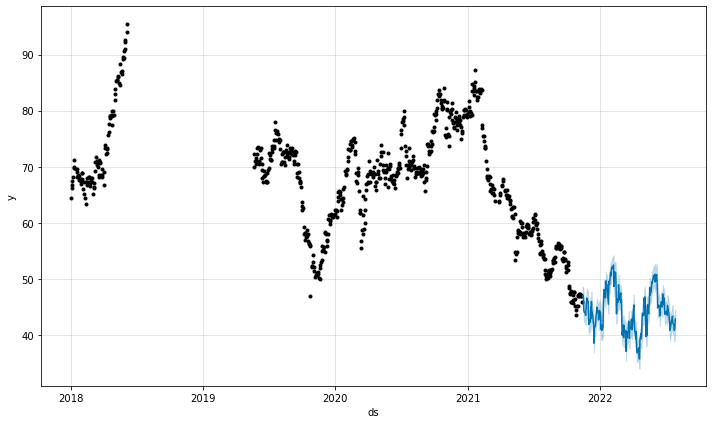

In [89]:
train_size = int(0.8 * len(df))
p_df = p_df.rename(columns = {"date": "ds"})
X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

model.fit(X_train)
forecast = model.predict(X_test)
model.plot(forecast)


In [90]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
823,2022-02-16
824,2022-02-17
825,2022-02-18
826,2022-02-19


In [91]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()
